# Koc University ENGR421 Fall 2020 HW3

## Onur Mavitaş


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sb

def safelog(x):
    return(np.log(x + 1e-100))

In [2]:
np.random.seed(421)

## Importing Data

In [3]:
# read data into memory
df_images = np.genfromtxt("hw02_data_set_images.csv", delimiter = ",")
df_labels = pd.read_csv("hw02_data_set_labels.csv", header=None)
df_labels = df_labels.to_numpy()

labels = []
for i in range(df_labels.shape[0]):
    labels.append(df_labels[i][0])
dct = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5} 
labels = [dct[key] for key in labels]
labels = np.asarray(labels)

slices = [25, 39, 39+25, 39+25+14, 39+25*2+14, 39+25*2+14*2, 39+25*3+14*2, 39+25*3+14*3, 39+25*4+14*3]
split_arr = np.split(df_images, slices)
split_labels = np.split(labels, slices)

train_set = np.concatenate((split_arr[0], split_arr[2],split_arr[4],split_arr[6],split_arr[8]))
test_set = np.concatenate((split_arr[1], split_arr[3],split_arr[5],split_arr[7],split_arr[9]))
train_labels = np.concatenate((split_labels[0], split_labels[2],split_labels[4],split_labels[6],split_labels[8]))
test_labels = np.concatenate((split_labels[1], split_labels[3],split_labels[5],split_labels[7],split_labels[9]))

#num of classes and labels
K = len(set(labels))
N = train_set.shape[0]

# one-of-K encoding
Y_truth = np.zeros((N, K)).astype(int)
Y_truth[range(N), train_labels - 1] = 1


# get x and y values
x = train_set
y = train_labels
x_test = test_set
y_test = test_labels

In [4]:
x[y==1].shape

(25, 320)

## Parameter Estimation

In [5]:
# calculate sample means
pcd = [np.sum(x[y == (c + 1)], axis=0)/(25) for c in range(K)]
class_means = pcd

In [16]:
np.set_printoptions(linewidth=200, edgeitems=5)
pcd

array([[0.  , 0.  , 0.  , 0.04, 0.04, ..., 0.56, 0.72, 0.68, 0.68, 0.64],
       [0.04, 0.24, 0.24, 0.2 , 0.12, ..., 0.88, 0.88, 0.8 , 0.56, 0.24],
       [0.  , 0.  , 0.  , 0.  , 0.  , ..., 0.16, 0.2 , 0.6 , 0.88, 0.8 ],
       [0.12, 0.44, 0.4 , 0.16, 0.12, ..., 0.64, 0.56, 0.28, 0.16, 0.08],
       [0.  , 0.12, 0.12, 0.08, 0.12, ..., 0.04, 0.28, 0.32, 0.48, 0.44]])

In [6]:
# calculate prior probabilities
def priors(class_label, array):
    return (len(array[array==1])/len(array))
class_priors = [priors(i+1, train_labels) for i in range(5)]

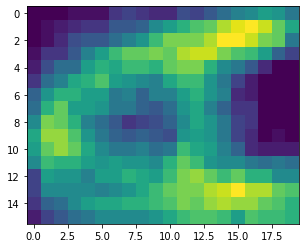

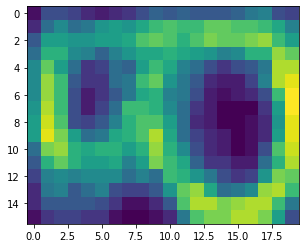

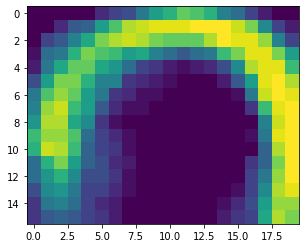

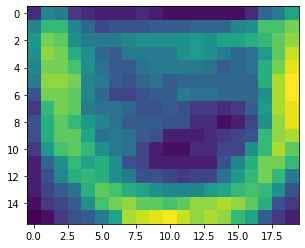

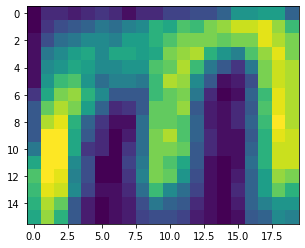

In [7]:
plt.imshow(np.reshape((np.transpose(pcd[0])), (16,20)), interpolation='nearest')
plt.show()
plt.imshow(np.reshape((np.transpose(pcd[1])), (16,20)), interpolation='nearest')
plt.show()
plt.imshow(np.reshape((np.transpose(pcd[2])), (16,20)), interpolation='nearest')
plt.show()
plt.imshow(np.reshape((np.transpose(pcd[3])), (16,20)), interpolation='nearest')
plt.show()
plt.imshow(np.reshape((np.transpose(pcd[4])), (16,20)), interpolation='nearest')
plt.show()

## Classification

In [8]:
#discriminant function
def discriminant(x, p_ij, prior):
    return np.sum(x*safelog(p_ij) + (1-x)*safelog(1-p_ij) , axis=1) + safelog(prior)

In [9]:
estimation1 = discriminant(x, pcd[0], class_priors[0])
estimation2 = discriminant(x, pcd[1], class_priors[1])
estimation3 = discriminant(x, pcd[2], class_priors[2])
estimation4 = discriminant(x, pcd[3], class_priors[3])
estimation5 = discriminant(x, pcd[4], class_priors[4])

In [10]:
pcd = np.array(pcd)
estimations = np.stack((estimation1,estimation2,estimation3,estimation4,estimation5))
estimations = np.transpose(estimations)
y_pred = []
for i in range(estimations.shape[0]):
        y_pred.append(np.argmax(estimations[i][:])+1)
        
y_pred = np.array(y_pred)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

## Confusion Matrices

In [11]:
confusion_matrix = pd.crosstab(np.array(y_pred), train_labels, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  24   1   0   1
3         0   0  24   0   0
4         0   1   0  25   0
5         0   0   0   0  24


In [12]:
#test set
estimation1 = discriminant(x_test, pcd[0], class_priors[0])
estimation2 = discriminant(x_test, pcd[1], class_priors[1])
estimation3 = discriminant(x_test, pcd[2], class_priors[2])
estimation4 = discriminant(x_test, pcd[3], class_priors[3])
estimation5 = discriminant(x_test, pcd[4], class_priors[4])
pcd = np.array(pcd)
estimations = np.stack((estimation1,estimation2,estimation3,estimation4,estimation5))
estimations = np.transpose(estimations)
y_pred_test = []
for i in range(estimations.shape[0]):
        y_pred_test.append(np.argmax(estimations[i][:])+1)
        
y_pred_test = np.array(y_pred_test)
confusion_matrix = pd.crosstab(np.array(y_pred_test), test_labels, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth  1   2  3   4   5
y_pred                   
1        7   0  0   0   0
2        0  11  3   2   4
3        0   0  7   0   0
4        7   3  3  12   0
5        0   0  1   0  10
